# WORKING WITH GPS DATA (shape files) IN THE DOMIAN OF AGRICULTURE

Welcome to our tutorial about shapefiles. In this notebook you will learn:

- how to read shapefiles (https://en.wikipedia.org/wiki/Shapefile ).

Let's start by importing some libraries:

In [1]:
# to download the files
import zipfile
import urllib
# to read the files
import geopandas as gpd
import pandas as pd
import json
# to plot the results
#%matplotlib qt
import matplotlib.pyplot as plt

## 1) Download the data

Now, let's download some example data provided in Github. For simplicity, we save the data in the current working directory:

In [2]:
# download of the data
urllib.request.urlretrieve("https://github.com/JohnDeere/SampleData/raw/master/Shapefiles/Export%20From%20MyJohnDeere%20-%20Harvest.zip",
                           "Harvest.zip")
# unzip the data
with zipfile.ZipFile("Harvest.zip", 'r') as zip_ref:
    zip_ref.extractall()
print("download and unzip of data succesful")

download and unzip of data succesful


The your working directory should now contain a folder named "doc". In this folder you now have five files that look like this:
![Screenshot-Files](Screenshot-Files.png)

Note, that the \*.dbf and the \*.json file can be opened with any text editor (like Notepad, Notepad++, Gedit, and so on). Sometimes it is convenient to open the \*.json file by the editor to have a quick preview. Nevertheless, the other files cannot be read with a standard editor, that is why we need some code to read the shapefile.

## 2) Read and plot the data

As the filename may indicate we have a recording of a soyabeans harvest. Now, let's read the data we have unzipped above:

In [3]:
gdf = gpd.read_file("./doc/Merriweather Farms-JT-01-Soybeans.shp")
print("reading data succesful")

reading data succesful


Let's simply plot the location of the very first point in our dataset to get a vague idea where the field can be found:

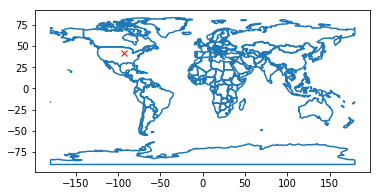

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot();
plt.plot(gdf.geometry.x[0],gdf.geometry.y[0],"rx");

Looks like somewhere in the Mid-West Region of the USA.

Let's create a first plot of the data of the soyabeans harvest of the field itself:

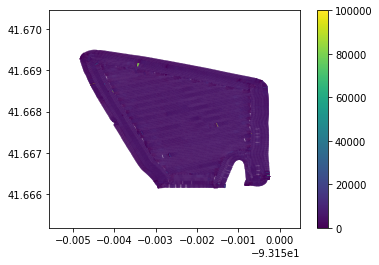

In [5]:
gdf.plot(column='WetMass', markersize=0.1, legend=True);

Well, this plot does not help much. In the following we will investigate the data more detailed.

## 3) Some visualisations

Set the time first:

In [6]:
gdf['IsoTime'] = pd.to_datetime(gdf['IsoTime'])
gdf = gdf.set_index(gdf['IsoTime'])

Plot again:

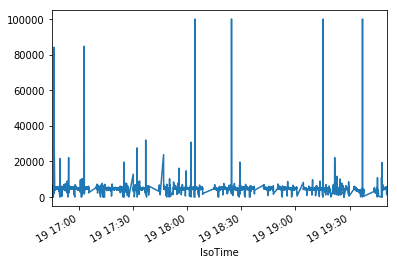

In [7]:
gdf['WetMass'].plot();

## Summary

This introduction shows how to download data, extract zip-files and reading shapefiles.


This can be seen as a starting point for calculations in the research field of agriculture. Examples would be calculation of harvest mass, optimization of fertilisers and so on.

**Acknowledgements:** we thank John Deere for providing the data (https://github.com/JohnDeere/SampleData ).

**Contact:** https://www.iese.fraunhofer.de/en/competencies/data.html